# This notebook solves the inverse kinematics of the BIorob arm of three links

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#print "Introduce the lenghts of the links (cm)\n"

#offset_base = float(raw_input("Lenght of offset from the base "))
#l1 = float(raw_input("Lenght of the first link "))
#l2 = float(raw_input("Lenght of the second link "))
#l3 = float(raw_input("Lenght of the third link "))

offset_base =float(35.85)
l1=float(30.0)
l2=float(35.0)
l3=float(25.1)

Work space of the robot (considering +/- 90 for the joints J3 and J4)

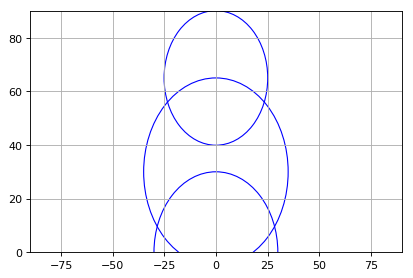

In [2]:
fig_work_space = plt.figure(dpi=80)
ax = fig_work_space.add_subplot(111)
ax.set_xlim(-(l1+l2+l3),(l1+l2+l3))
ax.set_ylim(0,(l1+l2+l3))
ax.grid()
circle1 = plt.Circle((0, 0), l1, fc='None', color='b')
circle2 = plt.Circle((0, l1), l2, fc='None', color='b')
circle3 = plt.Circle((0, l1+l2), l3, fc='None', color='b')
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

In [3]:
#px = float(raw_input("Which is the target position (X-axis)? "))
#py = float(raw_input("Which is the target position (Y-axis)? "))

px=34.0
py=58.0

#wx=px-1
#wy=py-1
#py=py-offset_base #the offset of the base is added to have the coordinates of the robot from the table 

## So, we know the position for the end-effector of the robot but we need to fix a position for the wirst. The following cell of code is going to represent the possibilities: 

In dotted green you find the line where wy=py and that line goes from (-l3,l3). Thus, the wirst is aling within the target
The solution is:
9.69643415374178 , 64.2726937719445
51.3455260232494 , 39.8577088829228
All the points in that curve are valid solutions for (wx,wy)
[165.52792482]
[-46.28617685]
Angles updated according to the anti-clock wise direction
[165.52792482]
[313.71382315]
Since we are only interested in approaching the target from above, we limited the range of theta from 165.527925 to 180 degrees


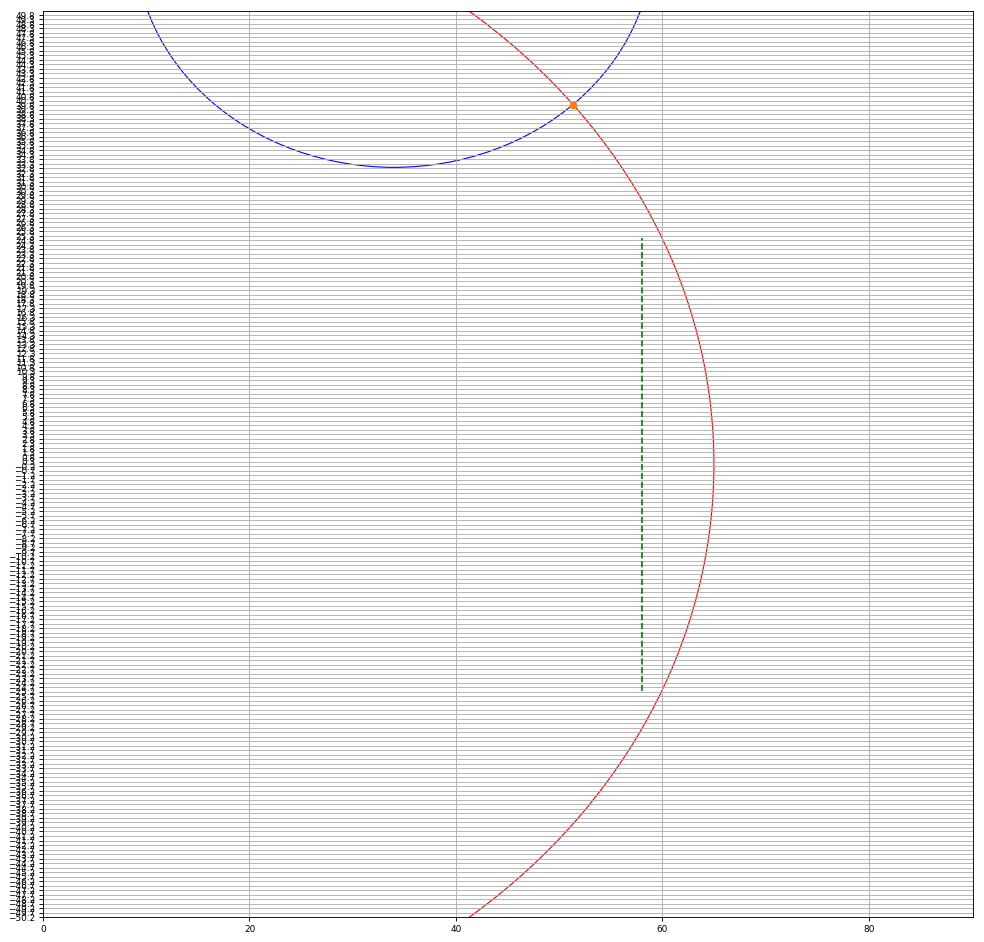

In [4]:
circle1 = plt.Circle((0, 0), l1+l2, fc='None', color='r')
circle2 = plt.Circle((px, py), l3, fc='None', color='b')


fig_wirst_region = plt.figure(figsize=(15, 15), dpi=80)
ax = fig_wirst_region.add_subplot(111)
ax.set_xlim(0,l1+l2+l3)
ax.set_ylim(-2*l3,2*l3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_yticks(np.arange(-2*l3,2*l3,0.5))
ax.tick_params(labelsize=8) 
ax.grid()


#Now we are going to set the criterion of fixing the wrist the closest to the target position. 

print "In dotted green you find the line where wy=py and that line goes from (-l3,l3). Thus, the wirst is aling within the target"
ax.plot([py,py],[-l3,+l3],'g--')


from sympy import *

x,y= symbols('x,y')
#print "If we make wx=px (taking the most vertical solution)"
[y1,y2] = solve([(px-px)**2+(y-py)**2-l3**2],dict=True)
#print y1,y2

#print "If we make wy=py (pushing the last link to be completely horizontal)"
[x1,x2] = solve([(x-px)**2+(py-py)**2-l3**2], dict=True)
#print x1,x2

circle_1 = Eq((x-px)**2+(y-py)**2,l3**2)
circle_2= Eq(x**2+y**2,(l1+l2)**2)
(x,y)=solve([circle_1,circle_2],(x,y))

ax.plot(x[0],x[1],'o')
ax.plot(y[0],y[1],'o')

ax.plot(px,py,'*')

print "The solution is:"
print x[0],",",x[1]
print y[0],",",y[1]

print "All the points in that curve are valid solutions for (wx,wy)"

a=np.array([x[1]-py],dtype=np.float64)
b=np.array([x[0]-px],dtype=np.float64)

c1=np.arctan2(a,b)#* 180 / np.pi
print c1* 180 / np.pi

a=np.array([y[1]-py],dtype=np.float64)
b=np.array([y[0]-px],dtype=np.float64)

c2=np.arctan2(a,b)#* 180 / np.pi
print c2* 180 / np.pi


#We set the angle values to positive values so we can then create the incremental array 
if (c1<0): 
    c1=c1+2*np.pi
elif (c2<0):
    c2=c2+2*np.pi

print "Angles updated according to the anti-clock wise direction"
print c1* 180 / np.pi
print c2* 180 / np.pi

#Now, c1 and c2 are positive angles (anti clock-wise reference) and we can build the incremental vector of angles. 
if (c1>c2): 
    print "Since we are only interested in approaching the target from above, we limited the range of theta from %f to 180 degrees"%(c2*180/np.pi)
    theta=np.arange(c2,np.pi,0.0001)
    first_border=c2
    #theta=np.arange(c2,c1,0.001)
else:
    print "Since we are only interested in approaching the target from above, we limited the range of theta from %f to 180 degrees"%(c1*180/np.pi)
    theta=np.arange(c1,np.pi,0.0001)
    first_border=c1
    #theta=np.arange(c1,c2,0.001)
    
#We give values to the the arch which are posible solutions for the wirst. 
x_=px+l3*np.cos(theta)
y_=py+l3*np.sin(theta)

#To plot, we use a reduced set of angles (for the shake of clarity)
ax.plot(x_,y_,'*')


Now, we have to set wx=lambda*px and try to maximize the resulting function or minimize the function (1-lamda)

wx=px+l3cos(theta)
wx=lambda*px
lamddapx=px+l3cos(theta)
lambda=f(theta)=1+(1/px)(l3cos(theta))
(1-lambda)=g(theta)=-(1/px)(l3cos(theta))
g'(theta)=l3sin(theta)/px
Lambda= 6.301679800151973e-05
wx= 33.99785742886795
The cos(theta)= 8.53613996832655e-05
The theta is 89.99510915205889
The only solution, to have a right approach to the target is to do it from below
Or using wx=lambdapx, wx=0.999937px
wx= 9.69643415374
wy= 64.2726937719


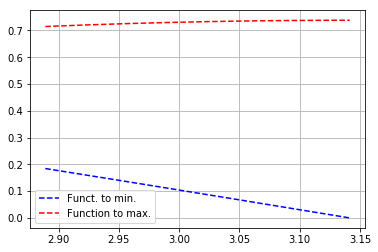

In [5]:
print "wx=px+l3cos(theta)"
print "wx=lambda*px"
print "lamddapx=px+l3cos(theta)"
print "lambda=f(theta)=1+(1/px)(l3cos(theta))"
print "(1-lambda)=g(theta)=-(1/px)(l3cos(theta))"
print "g'(theta)=l3sin(theta)/px"

fun=(l3*np.sin(theta))/px

aux=abs(fun)
#aux=fun

#print aux
print "Lambda=",aux.min()

print "wx=",(1-aux.min())*px
#This is the maximum value for lambda
lm=1-aux.min()

print "The cos(theta)=",px*(1-lm)/l3
          
theta_selected=np.arccos(px*(1-lm)/l3)
print "The theta is",theta_selected * 180 / np.pi

#We have to check if the theta is included within the range to set the sign of the angle
if ((theta_selected<first_border)):# and (theta_selected>np.pi)) : 
    print "The only solution, to have a right approach to the target is to do it from below"
    theta_selected=-np.arccos(px*(1-lm)/l3)
    
    print "Or using wx=lambdapx, wx=%fpx"%lm
    wx=float(x[0])
    wy=float(x[1])
    
    
else: 
    
    wx=lm*px
    wy=py+l3*np.sin(theta_selected)
    
    
plt.plot(theta,aux,'b--',label="Funct. to min.")
plt.plot(theta,abs(-l3*np.cos(theta)/px),'r--',label="Function to max.")
plt.grid()
plt.legend()

print "wx=",wx
print "wy=",wy



In [6]:
#The second restriction: 
#print "The second restriction:"
print "Is the following restriction met?"
print "(l1+l2)>=sqrt(wx^2+wy^2)"
print l1+l2,">=",np.sqrt(wx*wx+wy*wy),"\n"

#Check if the wirst position is in the work-space of the robot 
if (l1+l2)<(np.sqrt(wx*wx+wy*wy)):
    print "The wirst is out of the work-space"
    #print "To continue, we are going to change the value of wx by subtracting 1.0 to the original value"
    #wx=wx-1.0

#Computation of the cos(q2)(c3)
c2=(wy*wy+wx*wx-l1*l1-l2*l2)/(2*l1*l2)
print "cos(q2)=",c2
print "If cos has a positivesign, the angle should be on the first or fourth quadrant"
print "If cos has a negative sign, the angle should be on the second or third quadrant\n"

#Computation of the sin(q2)(s3)
#The sign choosen will determine the up or down elbow configuration
s2=-np.sqrt(1-c2*c2)
#Computation of q2    
q2=np.arctan2(s2,c2)

if (q2*180/np.pi)>0 : 
    print"q2[0]=",q2*180/np.pi,"First quadrant","or, which is equivalent:"
    print "q2[1]=",360-q2*180/np.pi, "fourth quadrant"
    
else: 
   
    print "q2[0]=",q2*180/np.pi+360,"fourth quadrant","or, which is equivalent:"
    print "q2[1]=",-q2*180/np.pi,"first quadrant "
    
q2_bis=-q2

Is the following restriction met?
(l1+l2)>=sqrt(wx^2+wy^2)
65.0 >= 65.0 

cos(q2)= 1.0
If cos has a positivesign, the angle should be on the first or fourth quadrant
If cos has a negative sign, the angle should be on the second or third quadrant

q2[0]= 360.0 fourth quadrant or, which is equivalent:
q2[1]= 0.0 first quadrant 


In [7]:
print "We are going to consider q2=%f"%(q2*180/np.pi)
#Computation of the cos(q1)(c1)

c1=(l2*s2*wy+wx*(l1+l2*c2))/(l1*l1+2*l1*l2*c2+l2*l2)
    
print "cos(q1)=",c1
    
#Computation of the sin(q1)(s1)
print "The sign of the sin of q1 could be positive or negative:"
s1=np.sqrt(1-c1*c1)
s1_bis=-np.sqrt(1-c1*c1)
print s1,"or",s1_bis
#Computation of q1
q1=np.arctan2(s1,c1)
q1_bis=np.arctan2(s1_bis,c1)
#To print the angle, uncomment the following line: 
print "So we have two angles sets:"
print "q1=",q1*180/np.pi
print "q2=",q2*180/np.pi
print "---"
print "q1=",q1_bis*180/np.pi
print "q2=",q2*180/np.pi

print "******************************************"

print "We are going to consider q2=%f"%(q2_bis*180/np.pi)
#Computation of the cos(q1)(c1)

c1=(l2*(np.sin(q2_bis))*wy+wx*(l1+l2*c2))/(l1*l1+2*l1*l2*c2+l2*l2)
    
print "cos(q1)=",c1
    
#Computation of the sin(q1)(s1)
print "Here again, the sign of the sin of q1 could be positive or negative:"
s1_1=np.sqrt(1-c1*c1)
s1_1_bis=-np.sqrt(1-c1*c1)
#Computation of q1
q1_1=np.arctan2(s1_1,c1)
q1_1_bis=np.arctan2(s1_1_bis,c1)

print "So we have two angles sets:"
print "q1=",q1_1*180/np.pi
print "q2=",q2_bis*180/np.pi
print "---"
print "q1=",q1_1_bis*180/np.pi
print "q2=",q2_bis*180/np.pi

We are going to consider q2=-0.000000
cos(q1)= 0.14917591005756584
The sign of the sin of q1 could be positive or negative:
0.9888106734145303 or -0.9888106734145303
So we have two angles sets:
q1= 81.4208276283415
q2= -0.0
---
q1= -81.4208276283415
q2= -0.0
******************************************
We are going to consider q2=0.000000
cos(q1)= 0.14917591005756584
Here again, the sign of the sin of q1 could be positive or negative:
So we have two angles sets:
q1= 81.4208276283415
q2= 0.0
---
q1= -81.4208276283415
q2= 0.0


Now, we are plotting the angles we already have, q1 and q2.
The partial end-effetor should be at the user-defined wrist position (9.696434,64.272694)


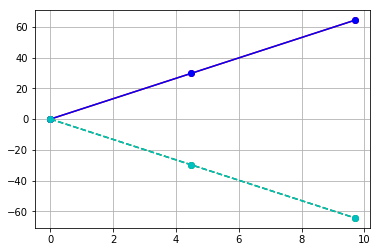

In [8]:
print "Now, we are plotting the angles we already have, q1 and q2." 
print "The partial end-effetor should be at the user-defined wrist position (%f,%f)"%(wx,wy)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0,l1*np.cos(q1),l1*np.cos(q1)+l2*np.cos(q1+q2)],[0,l1*np.sin(q1),l1*np.sin(q1)+l2*np.sin(q1+q2)],'r-o')
ax.plot([0,l1*np.cos(q1_bis),l1*np.cos(q1_bis)+l2*np.cos(q1_bis+q2_bis)],[0,l1*np.sin(q1_bis),l1*np.sin(q1_bis)+l2*np.sin(q1_bis+q2_bis)],'g--o')

ax.plot([0,l1*np.cos(q1_1),l1*np.cos(q1_1)+l2*np.cos(q1_1+q2_bis)],[0,l1*np.sin(q1_1),l1*np.sin(q1_1)+l2*np.sin(q1_1+q2_bis)],'b-o')
ax.plot([0,l1*np.cos(q1_1_bis),l1*np.cos(q1_1_bis)+l2*np.cos(q1_1_bis+q2_bis)],[0,l1*np.sin(q1_1_bis),l1*np.sin(q1_1_bis)+l2*np.sin(q1_1_bis+q2_bis)],'c--o')


ax.grid()

In [9]:
print "We are going to discard the sets that are not reaching the wrist position"
print "wrist=",(wx,wy)

print "So we have the following angles sets:"
print "q1=",q1*180/np.pi
print "q2=",q2*180/np.pi
print "---"
print "q1=",q1_bis*180/np.pi
print "q2=",q2*180/np.pi
print "---"
print "q1=",q1_1*180/np.pi
print "q2=",q2_bis*180/np.pi
print "---"
print "q1=",q1_1_bis*180/np.pi
print "q2=",q2_bis*180/np.pi

print "To see which of these are reaching the wirst position, we apply direct kinematics"
print "Direct kinematics for a two links arm:"
print "wx=l1*cos(q1)+l2*cos(q1+q2)"
print "wy=l1*sin(q1)+l2*sin(q1+q2)"

#Build arrays for each set 
q1_set=(q1,q1_bis,q1_1,q1_1_bis)
q2_set=(q2,q2,q2_bis,q2_bis)

#for loop to test the direct kinematics
k=0
#We allocate two positions since only two valid configurations are possible (elbow up/down)
q1=np.zeros(2)
q2=np.zeros(2)
for i in range (len(q1_set)):
    print "%d set of angles:"%i
    print (q1_set[i],q2_set[i])
    wx_reached=l1*np.cos(q1_set[i])+l2*np.cos(q1_set[i]+q2_set[i])
    wy_reached=l1*np.sin(q1_set[i])+l2*np.sin(q1_set[i]+q2_set[i])
    print "(wx,wy)=",(wx_reached,wy_reached)
    if ((np.abs(wx_reached-wx)<0.001) and (np.abs(wy_reached-wy)<0.001)):
        print "Selected set"
        q1[k]=q1_set[i]
        q2[k]=q2_set[i]
        k=k+1


We are going to discard the sets that are not reaching the wrist position
wrist= (9.69643415374178, 64.27269377194447)
So we have the following angles sets:
q1= 81.4208276283415
q2= -0.0
---
q1= -81.4208276283415
q2= -0.0
---
q1= 81.4208276283415
q2= 0.0
---
q1= -81.4208276283415
q2= 0.0
To see which of these are reaching the wirst position, we apply direct kinematics
Direct kinematics for a two links arm:
wx=l1*cos(q1)+l2*cos(q1+q2)
wy=l1*sin(q1)+l2*sin(q1+q2)
0 set of angles:
(1.4210615218133251, -0.0)
(wx,wy)= (9.696434153741777, 64.27269377194446)
Selected set
1 set of angles:
(-1.4210615218133251, -0.0)
(wx,wy)= (9.696434153741777, -64.27269377194446)
2 set of angles:
(1.4210615218133251, 0.0)
(wx,wy)= (9.696434153741777, 64.27269377194446)
Selected set
3 set of angles:
(-1.4210615218133251, 0.0)
(wx,wy)= (9.696434153741777, -64.27269377194446)


In [10]:
#Calculate the angle phi     

phi=np.arctan2((py-wy),(px-wx))

q3=np.zeros(2)
#To print the angle, uncomment the following line: 
print "phi=",phi*180/np.pi

#Computation of q3
q3[0]=phi-(q2[0]+q1[0])
print "q3[0]=",q3[0]*180/np.pi

q3[1]=phi-(q2[1]+q1[1])
print "q3[1]=",q3[1]*180/np.pi

phi= -14.47207517502494
q3[0]= -95.89290280336645
q3[1]= -95.89290280336645


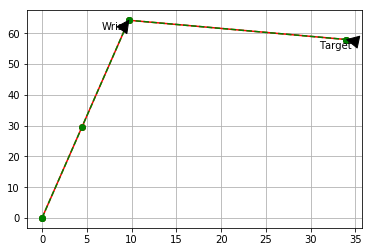

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Using the first set of angles
ax.plot([0,l1*np.cos(q1[0]),l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0]),l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0])+l3*np.cos(phi)],[0,l1*np.sin(q1[0]),l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0]),l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0])+l3*np.sin(phi)],'r-o')
    
#Using the second set of angles
ax.plot([0,l1*np.cos(q1[1]),l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1]),l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1])+l3*np.cos(phi)],[0,l1*np.sin(q1[1]),l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1]),l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1])+l3*np.sin(phi)],'g--o')
    
ax.plot([0,wx,px],[0,wy,py],'go')
ax.annotate('Wrist', xy=(wx, wy), xytext=(wx-3, wy-3),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Target', xy=(px, py), xytext=(px-3, py-3),arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()

In [12]:
print "First angle set"
print "q1",q1[0]*180/np.pi
print "q2",q2[0]*180/np.pi
print "q3",q3[0]*180/np.pi
print "******************"
print "Second angle set"
print "q1",q1[1]*180/np.pi
print "q2",q2[1]*180/np.pi
print "q3",q3[1]*180/np.pi
print "******************"
#double check of the positions calculated according to the direct kinematics
    
print "We check the direct kinematics to see if the angles are correct (first set):"
px_direct_1=l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0])+l3*np.cos(q1[0]+q2[0]+q3[0])
py_direct_1=l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0])+l3*np.sin(q1[0]+q2[0]+q3[0])
print "px=",px_direct_1
print "py=",py_direct_1
print "We check the direct kinematics to see if the angles are correct (second set):"
px_direct_2=l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1])+l3*np.cos(q1[1]+q2[1]+q3[1])
py_direct_2=l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1])+l3*np.sin(q1[1]+q2[1]+q3[1])
print "px=",px_direct_2
print "py=",py_direct_2

First angle set
q1 81.4208276283415
q2 -0.0
q3 -95.89290280336645
******************
Second angle set
q1 81.4208276283415
q2 0.0
q3 -95.89290280336645
******************
We check the direct kinematics to see if the angles are correct (first set):
px= 34.0
py= 57.999999999999986
We check the direct kinematics to see if the angles are correct (second set):
px= 34.0
py= 57.999999999999986


In [13]:
print "Values to introduce to the Joints of the Biorob"
print "*********************************"
print "JOINT 2: shoulder"
print "The joint 2 has the zero at the mid point (i.e. 90 degrees of this script)!!"
print "So, subtract 90 degrees, multiply by 5,5 and we will have the reference"
print "Original Q2",q1[0]*180/np.pi
# Fix this: print "Reference to joint 2",np.round(((q1[0]*180/np.pi)-90)*5.5)

print "*********************************"
print "JOINT 3: elbow"
print "1) Subtract 180 degrees to the original joint angle"
# Fix this: print "2) The reference should be the angle / 5.5"
if (q2[0]<0):
    print "Original Q3",np.abs(q2[0]*180/np.pi)+90
    # Fix this: print "Reference to Joint 3",np.round(((np.abs(q2[0]*180/np.pi)))*-5.5)
else:
    print "Original Q3",(90-q2[0]*180/np.pi)
    # Fix this: print "Reference to Joint 3",np.round(((-q2[0]*180/np.pi))*-5.5)

    
print "*********************************"
print "JOINT 4: pitch"
print "Same behav. as joint 3"
if (q3[0]<0):
    print "Original Q4",np.abs(q3[0]*180/np.pi)+90
    # Fix this: print "Reference to Q4",np.round(((np.abs(q3[0]*180/np.pi)))*-5.5)
else:
    print "Original Q4",(90-q3[0]*180/np.pi)
    # Fix this: print "Reference to Q4",np.round(((-q3[0]*180/np.pi))*-5.5)

    
print "*********************************"


Values to introduce to the Joints of the Biorob
*********************************
JOINT 2
The joint 2 has the zero at the mid point (i.e. 90 degrees of this script)!!
So, subtract 90 degrees, multiply by 5,5 and we will have the reference
Original Q2 81.4208276283415
Reference to joint 2 -47.0
*********************************
JOINT 3
1) Subtract 180 degrees to the original joint angle
2) The reference should be the angle / 5.5
Original Q3 90.0
Reference to Joint 3 -0.0
*********************************
JOINT 4
Same behav. as joint 3
Original Q4 185.89290280336644
Reference to Q4 -527.0
*********************************


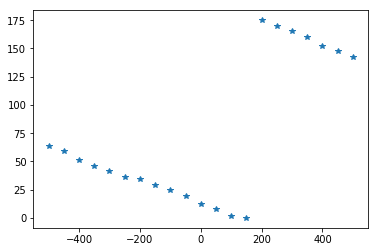

In [14]:
j3_ref=np.arange(-500,550,50)
j3_angle=np.array([63.7,58.8,51.2,46.3,41.5,36.5,34.7,29.2,24.7,19.3,12.1,7.5,2,0,175,170.3,165.4,160,152,147.8,142.7])

plt.plot(j3_ref,j3_angle,'*')